In [36]:
import os
import numpy as np
from numpy import trapz
import matplotlib.pyplot as plt

def mAP_calculator(dictionary, pathOfImages):
    
    recall=[]
    precision=[]
    
    sumatorioPersonasDetectadas=0
    sumatorioPersonasReales=0
    
    personasTotales=dictionary["totalPeople"]
    
    
    for img in (os.listdir(pathOfImages)):
        personasDetectadasPorImagen=len(dictionary[img][1])
        personasEnLaImagen=dictionary[img][0][0]
        
        sumatorioPersonasDetectadas=sumatorioPersonasDetectadas+personasDetectadasPorImagen
        sumatorioPersonasReales=sumatorioPersonasReales+personasEnLaImagen
        
        recall.append(sumatorioPersonasDetectadas/personasTotales)
        precision.append(sumatorioPersonasDetectadas/sumatorioPersonasReales)
        
        
    recall_vals=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    precision_vals=np.interp(recall_vals, recall, precision)
    
    mAP = (trapz(precision_vals, recall_vals))*100
    
    plt.title("mAP")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(recall_vals, precision_vals, 'b')
    plt.show()
    
    return mAP

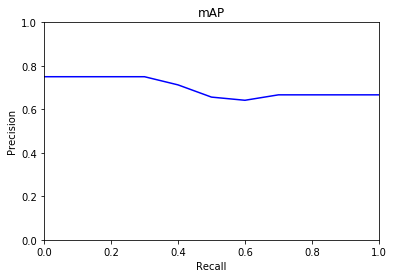

69.68749999999999

In [37]:
# Ejemplo
diccionario={'test_00000.jpg': [[4], [0.77, 0.77, 0.65]], 'test_00001.jpg': [[4], [0.69, 0.69]], 'totalPeople': 9, 'test_00002.jpg': [[1], [0.86]]}
pathOfImages=r'''C:\Users\arqc074\Desktop\keras-yolo3-master\dataset\images'''
mAP_calculator(diccionario, pathOfImages)


In [15]:
personasEnLaImagen=diccionario["test_00000.jpg"][0][0]

In [16]:
personasEnLaImagen

4